In [1]:
import pandas as pd

df = pd.read_csv('./data.csv')
df

,age,money,salary,gender,product
0,59,3.045900e+09,304590000,0,01020400620001;01012000200000000003;1052100100...
1,56,5.850000e+07,20000000,0,01030500560002;01030500510002;WR0001B
2,41,1.651000e+09,165100000,1,21001236
3,55,3.218800e+09,321880000,1,10-047-1387-0001;220002701;TD11330032000
4,54,2.392000e+08,23920000,1,1.05E+16
...,...,...,...,...,...
8195,33,1.300000e+06,20000000,1,10-01-20-024-0059-0000;01030500510002;TD113000...
8196,39,9.529000e+08,95290000,1,10-003-1381-0001
8197,32,3.770000e+07,20000000,1,200000303;200000301;10-01-20-024-0059-0000;WR0...
8198,43,0.000000e+00,20000000,0,200000303


In [25]:
from sklearn.preprocessing import MinMaxScaler


data = df[['age', 'money', 'salary']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [29]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


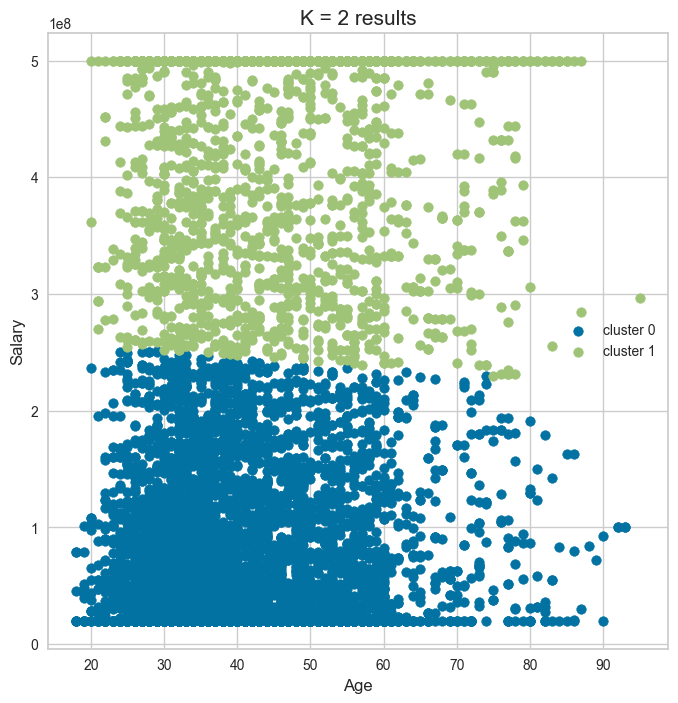

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'age'], df.loc[df['cluster'] == i, 'salary'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Age', size = 12)
plt.ylabel('Salary', size = 12)
plt.show()

C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jangha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

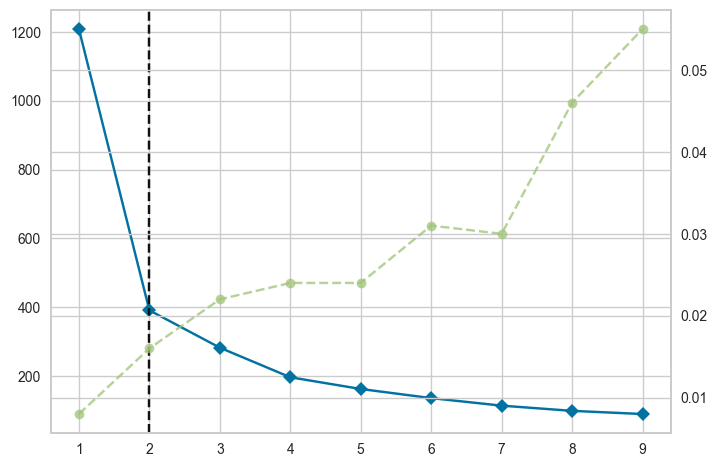

In [31]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)